In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv(r'D:/Data/online_retail_listing.csv', sep=';', encoding='latin-1')

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


After load the data, I will to show the steps that I will do to analyzing this datasets.

1. Exploratory Data Analysis
2. Missing Value Analysis
3. Outlier Value Analysis
4. RFM Analysis

Now, Let's go

**1. Exploratory Data Analysis**

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [5]:
data.shape

(1048575, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [11]:
# We will calculate a sale per invoice
## Because the datatype of price here is object, then we need to change it.
data['Price'] = data['Price'].apply(lambda x: float(str(x.replace(',','.'))))

# Then we calculate the sale
data['Sales'] = data['Quantity'] * data['Price']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.0,United Kingdom,30.0


In [12]:
# we can check the data type of datasets again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
 8   Sales        1048575 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 72.0+ MB


In [14]:
# We need to change the data type of InvoiceDate
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

Now we have the right data type. Let's explore something about this datasets

In [18]:
# How many unique invoice do we have
data['Invoice'].nunique()

52961

In [19]:
# How many customers do we have 
data['Customer ID'].nunique()

5924

In [24]:
# How many orders came from which country?
data['Country'].value_counts().head()

United Kingdom    963819
EIRE               17581
Germany            17327
France             14100
Netherlands         5054
Name: Country, dtype: int64

In [27]:
# What are the most expensive product?
data.groupby('StockCode').agg({'Price':'max'}).sort_values('Price', ascending=False).head()

,Price
StockCode,
M,38970.00
BANK CHARGES,18910.69
AMAZONFEE,16888.02
B,11062.06
POST,8142.75


**2.Missing Value Analysis**

In [28]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
Sales               0
dtype: int64

We can see that there are a lot of missing value here, especially **Customer ID**. Then, I will remove the rows where Customer ID is null

In [35]:
data.dropna(inplace=True)

In [36]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Sales          0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811893 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      811893 non-null  object        
 1   StockCode    811893 non-null  object        
 2   Description  811893 non-null  object        
 3   Quantity     811893 non-null  int64         
 4   InvoiceDate  811893 non-null  datetime64[ns]
 5   Price        811893 non-null  float64       
 6   Customer ID  811893 non-null  float64       
 7   Country      811893 non-null  object        
 8   Sales        811893 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.9+ MB


**3. Outlier Value Analysis**

In [43]:
for feature in ['Quantity','Price','Sales']:
    
    Q1 = data[feature].quantile(0.01)
    Q3 = data[feature].quantile(0.99)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q3 - 1.5*IQR
    
    if data[(data[feature] > upper) | (data[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(data[(data[feature] > upper) | (data[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
2503
Price yes
1789
Sales yes
2657


**4. RFM Analysis**

In [63]:
data.Invoice.value_counts()

576339     542
579196     533
578270     442
573576     435
567656     421
          ... 
552868       1
C530005      1
C529992      1
C510242      1
562208       1
Name: Invoice, Length: 44278, dtype: int64

In [64]:
data = data[~data["Invoice"].str.contains("C", na = False)]
data.Invoice.value_counts()

576339    542
579196    533
578270    442
573576    435
567656    421
         ... 
526219      1
503177      1
503168      1
503167      1
520316      1
Name: Invoice, Length: 36463, dtype: int64

In [65]:
df = data[['Customer ID','Invoice','InvoiceDate','Sales']]
df['Customer ID'] = df['Customer ID'].astype(int)
df.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_9884/761724100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype(int)


,Customer ID,Invoice,InvoiceDate,Sales
0,13085,489434,2009-01-12 07:45:00,83.4
1,13085,489434,2009-01-12 07:45:00,81.0
2,13085,489434,2009-01-12 07:45:00,81.0
3,13085,489434,2009-01-12 07:45:00,100.8
4,13085,489434,2009-01-12 07:45:00,30.0


In [66]:
# Find the max date
Min_date = df['InvoiceDate'].min()
Max_date = df['InvoiceDate'].max()

print('Max date: ', Max_date)
print('Min date: ', Min_date)

Max date:  2011-12-10 17:19:00
Min date:  2009-01-12 07:45:00


In [67]:
df_customer = df.groupby(['Customer ID']).agg({
    'Invoice':'nunique',
    'InvoiceDate': lambda x: (Max_date - x.max()).days,
    'Sales':'sum'
})

In [68]:
df_customer.head()

,Invoice,InvoiceDate,Sales
Customer ID,,,
12346,12,326,77556.46
12347,7,40,5408.50
12348,5,76,2019.40
12349,4,19,4428.69
12350,1,311,334.40


In [69]:
df_customer.rename(columns={ 'InvoiceDate':'Recency','Invoice':'Frequency','Sales':'Monetary'}, inplace=True)
df_customer.head()

,Frequency,Recency,Monetary
Customer ID,,,
12346,12,326,77556.46
12347,7,40,5408.50
12348,5,76,2019.40
12349,4,19,4428.69
12350,1,311,334.40


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

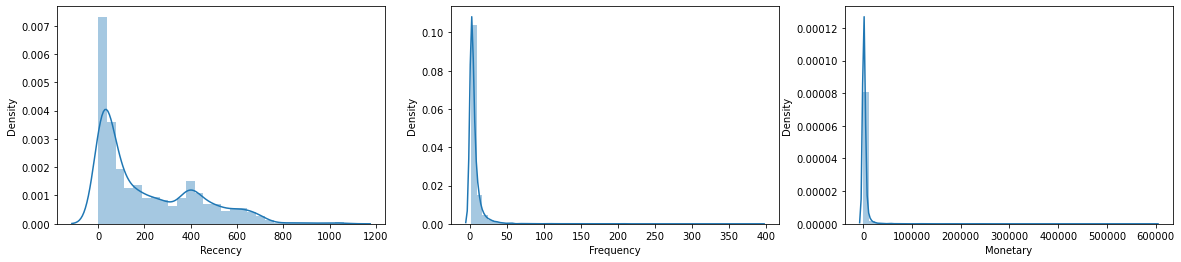

In [81]:
# Draw the distribution

fig, ax = plt.subplots(1, 3, figsize=(20,4))
sns.distplot(df_customer['Recency'], ax = ax[0])
sns.distplot(df_customer['Frequency'], ax = ax[1])
sns.distplot(df_customer['Monetary'], ax = ax[2])
plt.show()

In [82]:
# We need to normalize the data
from sklearn.preprocessing import MinMaxScaler
# create scaler
sc = MinMaxScaler((0,1))
df_customer_nom = sc.fit_transform(df_customer)

In [88]:
pd.DataFrame(df_customer_nom).head()

,0,1,2
0,0.028205,0.306968,0.129837
1,0.015385,0.037665,0.009054
2,0.010256,0.071563,0.003381
3,0.007692,0.017891,0.007414
4,0.000000,0.292844,0.000560


<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='SSE'>

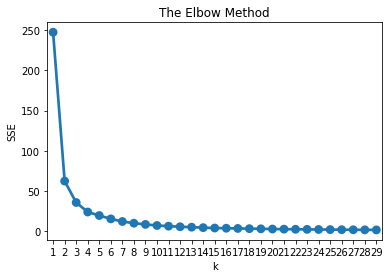

In [91]:
# put data in KNN

# Using Elbow to choose the number of clusters
from sklearn.cluster import KMeans

sse = {}
for k in range(1,30):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_customer_nom)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In this, I will choose k =6

In [94]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(df_customer_nom)

KMeans(n_clusters=6, random_state=42)

In [95]:
df_customer['Cluster'] = model.labels_
df_customer.head()

,Frequency,Recency,Monetary,Cluster
Customer ID,,,,
12346,12,326,77556.46,2
12347,7,40,5408.50,0
12348,5,76,2019.40,0
12349,4,19,4428.69,0
12350,1,311,334.40,2


In [97]:
df_customer.groupby(['Cluster']).agg(
    {
        'Recency':'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    }
).round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,41.93,8.49,3654.87
1,607.42,1.47,574.85
2,408.31,2.83,1065.12
3,924.51,1.05,264.96
4,9.05,148.50,161298.43
5,208.30,3.72,1331.37


So, we have 6 groups of customer like this. I think it will help for the company.